### `Business Problem Overview`
**Objective:** To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.


#### **Understanding and Defining Churn:**
There are two main models of payment in the telecom industry - postpaid and prepaid.

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.
However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice
Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers.

#### **Definitions of Churn:**
There are various ways to define churn, such as:
**1.Revenue-based churn:** Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. 
**2.Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

**In this project, we will use the usage-based definition to define churn.**

#### **High-value Churn:**
**In this project, we will define high-value customers based on a certain metric and predict churn only on high-value customers.**
* total_ic_mou_9
* total_og_mou_9
* vol_2g_mb_9
* vol_3g_mb_9

#### Understanding the Business Objective and the Data:
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.


#### Understanding Customer Behaviour During Churn:
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :
1. **The ‘good’ phase**: In this phase, the customer is happy with the service and behaves as usual.

2. **The ‘action’ phase:** The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. **The ‘churn’ phase:** In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.


**In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.**

#### Data Dictionary:
The data dictionary can be download using below link:
[Dictionay.xlsx](https://cdn.upgrad.com/UpGrad/temp/a625d1ee-b8d7-4edb-bdde-b1d82beaf5b4/Data+Dictionary-+Telecom+Churn+Case+Study.xlsx)

#### Dataset:
The dataset can be download using this [link](https://drive.google.com/file/d/1SWnADIda31mVFevFcfkGtcgBHTKKI94J/view?usp=sharing).

### `Approach:`

#### Data Preparation:
The following data preparation steps are crucial for this problem:

1. Derive new features
This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.


2. Filter high-value customers
As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

After filtering the high-value customers, you should get about 29.9k rows.


3. Tag churners and remove attributes of the churn phase
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

* total_ic_mou_9
* total_og_mou_9
* vol_2g_mb_9
* vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).


### Modelling
Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

 

In some cases, both of the above-stated goals can be achieved by a single machine learning model. But here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model.

 

Also, since the rate of churn is typically low (about 5-10%, this is called class-imbalance) - try using techniques to handle class imbalance. 


You can take the following suggestive steps to build the model:

Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

Derive new features.

Reduce the number of variables using PCA.

Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

Finally, choose a model based on some evaluation metric.

 

The above model will only be able to achieve one of the two goals - to predict customers who will churn. You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components which are not easy to interpret.

 

Therefore, build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family. In case of logistic regression, make sure to handle multi-collinearity.

 

After identifying important predictors, display them visually - you can use plots, summary tables etc. - whatever you think best conveys the importance of features.

 

Finally, recommend strategies to manage customer churn based on your observations.

## Step 1: importing libraries and data

In [1]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# loading telecom churn data
churn = pd.read_csv(r"C:\Users\panka\Downloads\telecom_churn_data.csv")
churn.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# Shape of the datafram
churn.shape

(99999, 226)

In [4]:
# lets look at the statistical description of the attributes
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

#### There is no target variable present in the data. Let's create one.
<br>
<br>
<br>


## Step 2: Creating Target variable (Churn: 1, Not churn: 0)

#### As mentioned in the problem statement - we will be considering those customer as churn who has not:
**`Received any incoming call(s)`**<br>
**`Made any outgoing call(s)`**<br>
**`Did not use any data service (2G or 3G)`**<br>

In [5]:
# assinging '0' for churn; '1' for not_churn
churn['churn'] = np.where(churn['total_ic_mou_9'] + churn['total_og_mou_9'] + churn['vol_2g_mb_9'] + churn['vol_3g_mb_9'] > 0, 0, 1)

# dropping all the columns with '_9' in it.
churn = churn.drop([col for col in churn.columns if '_9' in col],axis=1)

In [6]:
# Let's look at few records
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.4,0.0,101.20,3.58,1
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,0.0,0.0,0.0,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.0,0.0,1.83,0.00,0.0,0.00,0.00,0.0,4,9,11,74,384,283,44,154,65,6/29/2014,7/31/2014,8/28/2014,

## Step 3: Filtering data for High-value customers

In [7]:
# replacing NaN with zero
churn.fillna(0, inplace = True) 

In [8]:
#total_rech_amt_6 + total_data_rech_6
# Earning in June month
churn['total_data_rech_6'] = (churn['total_rech_data_6'] * churn['av_rech_amt_data_6'])
avg_total_rech_6 = churn['total_rech_amt_6'] + churn['total_data_rech_6']
churn['avg_total_rech_6'] = avg_total_rech_6

In [9]:
#total_rech_amt_7 + total_data_rech_7
# Earning in July month
churn['total_data_rech_7'] = (churn['total_rech_data_7'] * churn['av_rech_amt_data_7'])
avg_total_rech_7 = churn['total_rech_amt_7'] + churn['total_data_rech_7']
churn['avg_total_rech_7'] = avg_total_rech_7

In [10]:
# calculating average of
churn['avg_total_earning'] = (churn['avg_total_rech_6'] + churn['avg_total_rech_7'])/2

#### We are only considering those customers who is in top 30% of average spending amount.

In [11]:
# Filtering customers with top 30% of average spending amount.
churn = churn[churn['avg_total_earning'] > churn["avg_total_earning"].quantile(0.70)]

In [12]:
churn.shape

(29953, 178)

## Step 4: Derive Features

First two months(June & July) is 'happy phase' and third month is 'Action Phase'. So we will be considering these 3 months to derive new variables.

And here, we are using the following formulae to derive new variables:<br>
`avg_6_7 = (month_6 + month_7)/2`<br>
`avg_new = (month_8 - avg_6_7)/avg_6_7`

ARPU


In [13]:
arpu_6_7_8 = ((churn['arpu_8'] - (churn['arpu_6'] + churn['arpu_7'])/2) / (churn['arpu_6'] + churn['arpu_7'])/2)
churn['arpu_new'] = arpu_6_7_8
churn = churn.drop(['arpu_6', 'arpu_7', 'arpu_8'], axis=1)
churn['arpu_new'].head()

0     0.009343
7     0.405527
8    -0.171142
21    0.036709
23    0.434008
Name: arpu_new, dtype: float64

ONNET

In [14]:
onnet_mou = ((churn['onnet_mou_8'] - (churn['onnet_mou_6'] + churn['onnet_mou_7'])/2) / (churn['onnet_mou_6'] + churn['onnet_mou_7'])/2)
churn['onnet_mou_new'] = onnet_mou
churn = churn.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'], axis=1)
churn['onnet_mou_new'].head()

0          NaN
7    -0.017641
8    -0.227064
21   -0.068480
23   -0.081460
Name: onnet_mou_new, dtype: float64

OFFNET

In [15]:
offnet_mou = ((churn['offnet_mou_8'] - (churn['offnet_mou_6'] + churn['offnet_mou_7'])/2) / (churn['offnet_mou_6'] + churn['offnet_mou_7'])/2)
churn['offnet_mou_new'] = offnet_mou
churn = churn.drop(['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1)
churn['offnet_mou_new'].head()

0          NaN
7    -0.090333
8     0.139298
21    0.047167
23    0.339031
Name: offnet_mou_new, dtype: float64

ROAM_IC_MOU

In [16]:
roam_ic_mou = ((churn['roam_ic_mou_8'] - (churn['roam_ic_mou_6'] + churn['roam_ic_mou_7'])/2) / (churn['roam_ic_mou_6'] + churn['roam_ic_mou_7'])/2)
churn['roam_ic_mou_new'] = roam_ic_mou
churn = churn.drop(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'], axis=1)
churn['roam_ic_mou_new'].head()

0          NaN
7     0.068182
8          NaN
21         NaN
23         NaN
Name: roam_ic_mou_new, dtype: float64

ROAM_OG_MOU

In [17]:
roam_og_mou = ((churn['roam_og_mou_8'] - (churn['roam_og_mou_6'] + churn['roam_og_mou_7'])/2) / (churn['roam_og_mou_6'] + churn['roam_og_mou_7'])/2)
churn['roam_og_mou_new'] = roam_og_mou
churn = churn.drop(['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'], axis=1)
churn['roam_og_mou_new'].head()

0         NaN
7     0.27381
8         NaN
21        NaN
23        NaN
Name: roam_og_mou_new, dtype: float64

LOC_OG_T2T_MOU

In [18]:
loc_og_t2t_mou = ((churn['loc_og_t2t_mou_8'] - (churn['loc_og_t2t_mou_6'] + churn['loc_og_t2t_mou_7'])/2) / (churn['loc_og_t2t_mou_6'] + churn['loc_og_t2t_mou_7'])/2)
churn['loc_og_t2t_mou_new'] = loc_og_t2t_mou
churn = churn.drop(['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8'], axis=1)
churn['loc_og_t2t_mou_new'].head()

0          NaN
7    -0.006675
8    -0.237867
21    0.846805
23   -0.081460
Name: loc_og_t2t_mou_new, dtype: float64

LOC_OG_T2M_MOU

In [19]:
loc_og_t2m_mou = ((churn['loc_og_t2m_mou_8'] - (churn['loc_og_t2m_mou_6'] + churn['loc_og_t2m_mou_7'])/2) / (churn['loc_og_t2m_mou_6'] + churn['loc_og_t2m_mou_7'])/2)
churn['loc_og_t2m_mou_new'] = loc_og_t2m_mou
churn = churn.drop(['loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8'], axis=1)
churn['loc_og_t2m_mou_new'].head()

0          NaN
7    -0.142673
8    -0.083245
21    0.041560
23    0.197605
Name: loc_og_t2m_mou_new, dtype: float64

LOC_OG_T2F_MOU

In [20]:
loc_og_t2f_mou = ((churn['loc_og_t2f_mou_8'] - (churn['loc_og_t2f_mou_6'] + churn['loc_og_t2f_mou_7'])/2) / (churn['loc_og_t2f_mou_6'] + churn['loc_og_t2f_mou_7'])/2)
churn['loc_og_t2f_mou_new'] = loc_og_t2f_mou
churn = churn.drop(['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8'], axis=1)
churn['loc_og_t2f_mou_new'].head()

0          NaN
7    -0.023045
8          NaN
21    0.803333
23         NaN
Name: loc_og_t2f_mou_new, dtype: float64

LOC_OG_T2C_MOU

In [21]:
loc_og_t2c_mou = ((churn['loc_og_t2c_mou_8'] - (churn['loc_og_t2c_mou_6'] + churn['loc_og_t2c_mou_7'])/2) / (churn['loc_og_t2c_mou_6'] + churn['loc_og_t2c_mou_7'])/2)
churn['loc_og_t2c_mou_new'] = loc_og_t2c_mou
churn = churn.drop(['loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8'], axis=1)
churn['loc_og_t2c_mou_new'].head()

0     NaN
7     NaN
8     inf
21    NaN
23    inf
Name: loc_og_t2c_mou_new, dtype: float64

LOC_OG_MOU

In [22]:
loc_og_mou = ((churn['loc_og_mou_8'] - (churn['loc_og_mou_6'] + churn['loc_og_mou_7'])/2) / (churn['loc_og_mou_6'] + churn['loc_og_mou_7'])/2)
churn['loc_og_mou_new'] = loc_og_mou
churn = churn.drop(['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8'], axis=1)
churn['loc_og_mou_new'].head()

0          NaN
7    -0.116228
8    -0.202692
21    0.089403
23    0.092897
Name: loc_og_mou_new, dtype: float64

STD_OG_T2T_MOU

In [23]:
std_og_t2t_mou = ((churn['std_og_t2t_mou_8'] - (churn['std_og_t2t_mou_6'] + churn['std_og_t2t_mou_7'])/2) / (churn['std_og_t2t_mou_6'] + churn['std_og_t2t_mou_7'])/2)
churn['std_og_t2t_mou_new'] = std_og_t2t_mou
churn = churn.drop(['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8'], axis=1)
churn['std_og_t2t_mou_new'].head()

0          NaN
7    -0.032349
8    -0.204838
21   -0.111996
23         NaN
Name: std_og_t2t_mou_new, dtype: float64

STD_OG_T2M_MOU

In [24]:
std_og_t2m_mou = ((churn['std_og_t2m_mou_8'] - (churn['std_og_t2m_mou_6'] + churn['std_og_t2m_mou_7'])/2) / (churn['std_og_t2m_mou_6'] + churn['std_og_t2m_mou_7'])/2)
churn['std_og_t2m_mou_new'] = std_og_t2m_mou
churn = churn.drop(['std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8'], axis=1)
churn['std_og_t2m_mou_new'].head()

0          NaN
7     0.050919
8     1.344817
21    0.047466
23    2.023823
Name: std_og_t2m_mou_new, dtype: float64

STD_OG_T2F_MOU

In [25]:
std_og_t2f_mou = ((churn['std_og_t2f_mou_8'] - (churn['std_og_t2f_mou_6'] + churn['std_og_t2f_mou_7'])/2) / (churn['std_og_t2f_mou_6'] + churn['std_og_t2f_mou_7'])/2)
churn['std_og_t2f_mou_new'] = std_og_t2f_mou
churn = churn.drop(['std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8'], axis=1)
churn['std_og_t2f_mou_new'].head()

0          NaN
7     0.061892
8          NaN
21         NaN
23         NaN
Name: std_og_t2f_mou_new, dtype: float64

STD_OG_T2C_MOU

In [26]:
std_og_t2c_mou = ((churn['std_og_t2c_mou_8'] - (churn['std_og_t2c_mou_6'] + churn['std_og_t2c_mou_7'])/2) / (churn['std_og_t2c_mou_6'] + churn['std_og_t2c_mou_7'])/2)
churn['std_og_t2c_mou_new'] = std_og_t2c_mou
churn = churn.drop(['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8'], axis=1)
churn['std_og_t2c_mou_new'].head()

0    NaN
7    NaN
8    NaN
21   NaN
23   NaN
Name: std_og_t2c_mou_new, dtype: float64

STD_OG_MOU

In [27]:
std_og_mou = ((churn['std_og_mou_8'] - (churn['std_og_mou_6'] + churn['std_og_mou_7'])/2) / (churn['std_og_mou_6'] + churn['std_og_mou_7'])/2)
churn['std_og_mou_new'] = std_og_mou
churn = churn.drop(['std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8'], axis=1)
churn['std_og_mou_new'].head()

0          NaN
7     0.036176
8    -0.070487
21    0.026443
23    2.023823
Name: std_og_mou_new, dtype: float64

ISD_OG_MOU

In [28]:
isd_og_mou = ((churn['isd_og_mou_8'] - (churn['isd_og_mou_6'] + churn['isd_og_mou_7'])/2) / (churn['isd_og_mou_6'] + churn['isd_og_mou_7'])/2)
churn['isd_og_mou_new'] = isd_og_mou
churn = churn.drop(['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8'], axis=1)
churn['isd_og_mou_new'].head()

0           NaN
7     27.555556
8           NaN
21          NaN
23    -0.250000
Name: isd_og_mou_new, dtype: float64

SPL_OG_MOU

In [29]:
spl_og_mou = ((churn['spl_og_mou_8'] - (churn['spl_og_mou_6'] + churn['spl_og_mou_7'])/2) / (churn['spl_og_mou_6'] + churn['spl_og_mou_7'])/2)
churn['spl_og_mou_new'] = spl_og_mou
churn = churn.drop(['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8'], axis=1)
churn['spl_og_mou_new'].head()

0           NaN
7      0.472222
8           inf
21          NaN
23    88.300000
Name: spl_og_mou_new, dtype: float64

OG_OTHERS

In [30]:
og_others = ((churn['og_others_8'] - (churn['og_others_6'] + churn['og_others_7'])/2) / (churn['og_others_6'] + churn['og_others_7'])/2)
churn['og_others_new'] = og_others
churn = churn.drop(['og_others_6', 'og_others_7', 'og_others_8'], axis=1)
churn['og_others_new'].head()

0    NaN
7    NaN
8    NaN
21   NaN
23   NaN
Name: og_others_new, dtype: float64

TOTAL_OG_MOU

In [31]:
total_og_mou = ((churn['total_og_mou_8'] - (churn['total_og_mou_6'] + churn['total_og_mou_7'])/2) / (churn['total_og_mou_6'] + churn['total_og_mou_7'])/2)
churn['total_og_mou_new'] = total_og_mou
churn = churn.drop(['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'], axis=1)
churn['total_og_mou_new'].head()

0          NaN
7    -0.090368
8    -0.158747
21    0.032813
23    0.186338
Name: total_og_mou_new, dtype: float64

LOC_IC_T2T_MOU

In [32]:
loc_ic_t2t_mou = ((churn['loc_ic_t2t_mou_8'] - (churn['loc_ic_t2t_mou_6'] + churn['loc_ic_t2t_mou_7'])/2) / (churn['loc_ic_t2t_mou_6'] + churn['loc_ic_t2t_mou_7'])/2)
churn['loc_ic_t2t_mou_new'] = loc_ic_t2t_mou
churn = churn.drop(['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8'], axis=1)
churn['loc_ic_t2t_mou_new'].head()

0          inf
7    -0.098949
8    -0.245398
21    0.521113
23    0.218746
Name: loc_ic_t2t_mou_new, dtype: float64

LOC_IC_T2M_MOU 

In [33]:
loc_ic_t2m_mou = ((churn['loc_ic_t2m_mou_8'] - (churn['loc_ic_t2m_mou_6'] + churn['loc_ic_t2m_mou_7'])/2) / (churn['loc_ic_t2m_mou_6'] + churn['loc_ic_t2m_mou_7'])/2)
churn['loc_ic_t2m_mou_new'] = loc_ic_t2m_mou
churn = churn.drop(['loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8'], axis=1)
churn['loc_ic_t2m_mou_new'].head()

0          inf
7    -0.111986
8    -0.141839
21    0.084854
23    0.100839
Name: loc_ic_t2m_mou_new, dtype: float64

LOC_IC_T2F_MOU 

In [34]:
loc_ic_t2f_mou = ((churn['loc_ic_t2f_mou_8'] - (churn['loc_ic_t2f_mou_6'] + churn['loc_ic_t2f_mou_7'])/2) / (churn['loc_ic_t2f_mou_6'] + churn['loc_ic_t2f_mou_7'])/2)
churn['loc_ic_t2f_mou_new'] = loc_ic_t2f_mou
churn = churn.drop(['loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8'], axis=1)
churn['loc_ic_t2f_mou_new'].head()

0          inf
7    -0.172068
8          NaN
21    0.447315
23         inf
Name: loc_ic_t2f_mou_new, dtype: float64

LOC_IC_MOU 

In [35]:
loc_ic_mou = ((churn['loc_ic_mou_8'] - (churn['loc_ic_mou_6'] + churn['loc_ic_mou_7'])/2) / (churn['loc_ic_mou_6'] + churn['loc_ic_mou_7'])/2)
churn['loc_ic_mou_new'] = loc_ic_mou
churn = churn.drop(['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8'], axis=1)
churn['loc_ic_mou_new'].head()

0          inf
7    -0.129940
8    -0.174995
21    0.123480
23    0.135188
Name: loc_ic_mou_new, dtype: float64

STD_IC_T2T_MOU

In [36]:
std_ic_t2t_mou = ((churn['std_ic_t2t_mou_8'] - (churn['std_ic_t2t_mou_6'] + churn['std_ic_t2t_mou_7'])/2) / (churn['std_ic_t2t_mou_6'] + churn['std_ic_t2t_mou_7'])/2)
churn['std_ic_t2t_mou_new'] = std_ic_t2t_mou
churn = churn.drop(['std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8'], axis=1)
churn['std_ic_t2t_mou_new'].head()

0           NaN
7      0.061884
8     -0.163793
21    -0.245509
23    12.867647
Name: std_ic_t2t_mou_new, dtype: float64

STD_IC_T2M_MOU

In [37]:
std_ic_t2m_mou = ((churn['std_ic_t2m_mou_8'] - (churn['std_ic_t2m_mou_6'] + churn['std_ic_t2m_mou_7'])/2) / (churn['std_ic_t2m_mou_6'] + churn['std_ic_t2m_mou_7'])/2)
churn['std_ic_t2m_mou_new'] = std_ic_t2m_mou
churn = churn.drop(['std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8'], axis=1)
churn['std_ic_t2m_mou_new'].head()

0          NaN
7     0.073513
8    -0.237740
21    0.230268
23    1.017610
Name: std_ic_t2m_mou_new, dtype: float64

STD_IC_T2F_MOU

In [38]:
std_ic_t2f_mou = ((churn['std_ic_t2f_mou_8'] - (churn['std_ic_t2f_mou_6'] + churn['std_ic_t2f_mou_7'])/2) / (churn['std_ic_t2f_mou_6'] + churn['std_ic_t2f_mou_7'])/2)
churn['std_ic_t2f_mou_new'] = std_ic_t2f_mou
churn = churn.drop(['std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8'], axis=1)
churn['std_ic_t2f_mou_new'].head()

0          NaN
7    -0.121515
8          NaN
21         NaN
23         NaN
Name: std_ic_t2f_mou_new, dtype: float64

STD_IC_T2O_MOU

In [39]:
std_ic_t2o_mou = ((churn['std_ic_t2o_mou_8'] - (churn['std_ic_t2o_mou_6'] + churn['std_ic_t2o_mou_7'])/2) / (churn['std_ic_t2o_mou_6'] + churn['std_ic_t2o_mou_7'])/2)
churn['std_ic_t2o_mou_new'] = std_ic_t2o_mou
churn = churn.drop(['std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], axis=1)
churn['std_ic_t2o_mou_new'].head()

0    NaN
7    NaN
8    NaN
21   NaN
23   NaN
Name: std_ic_t2o_mou_new, dtype: float64

STD_IC_MOU

In [40]:
std_ic_mou = ((churn['std_ic_mou_8'] - (churn['std_ic_mou_6'] + churn['std_ic_mou_7'])/2) / (churn['std_ic_mou_6'] + churn['std_ic_mou_7'])/2)
churn['std_ic_mou_new'] = std_ic_mou
churn = churn.drop(['std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8'], axis=1)
churn['std_ic_mou_new'].head()

0          NaN
7     0.024221
8    -0.236157
21    0.154580
23    1.356562
Name: std_ic_mou_new, dtype: float64

TOTAL_IC_MOU

In [41]:
total_ic_mou = ((churn['total_ic_mou_8'] - (churn['total_ic_mou_6'] + churn['total_ic_mou_7'])/2) / (churn['total_ic_mou_6'] + churn['total_ic_mou_7'])/2)
churn['total_ic_mou_new'] = total_ic_mou
churn = churn.drop(['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'], axis=1)
churn['total_ic_mou_new'].head()

0          inf
7    -0.069021
8    -0.187514
21    0.135037
23    0.185556
Name: total_ic_mou_new, dtype: float64

SPL_IC_MOU 

In [42]:
spl_ic_mou = ((churn['spl_ic_mou_8'] - (churn['spl_ic_mou_6'] + churn['spl_ic_mou_7'])/2) / (churn['spl_ic_mou_6'] + churn['spl_ic_mou_7'])/2)
churn['spl_ic_mou_new'] = spl_ic_mou
churn = churn.drop(['spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8'], axis=1)
churn['spl_ic_mou_new'].head()

0      NaN
7    -0.25
8      NaN
21     NaN
23     NaN
Name: spl_ic_mou_new, dtype: float64

ISD_IC_MOU

In [43]:
isd_ic_mou = ((churn['isd_ic_mou_8'] - (churn['isd_ic_mou_6'] + churn['isd_ic_mou_7'])/2) / (churn['isd_ic_mou_6'] + churn['isd_ic_mou_7'])/2)
churn['isd_ic_mou_new'] = isd_ic_mou
churn = churn.drop(['isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8'], axis=1)
churn['isd_ic_mou_new'].head()

0          NaN
7     0.702080
8          NaN
21         NaN
23   -0.183758
Name: isd_ic_mou_new, dtype: float64

IC_OTHERS

In [44]:
ic_others = ((churn['ic_others_8'] - (churn['ic_others_6'] + churn['ic_others_7'])/2) / (churn['ic_others_6'] + churn['ic_others_7'])/2)
churn['ic_others_new'] = ic_others
churn = churn.drop(['ic_others_6', 'ic_others_7', 'ic_others_8'], axis=1)
churn['ic_others_new'].head()

0          NaN
7    -0.005254
8          NaN
21         NaN
23    0.970561
Name: ic_others_new, dtype: float64

TOTAL_RECH_NUM

In [45]:
total_rech_num = ((churn['total_rech_num_8'] - (churn['total_rech_num_6'] + churn['total_rech_num_7'])/2) / (churn['total_rech_num_6'] + churn['total_rech_num_7'])/2)
churn['total_rech_num_new'] = total_rech_num
churn = churn.drop(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'], axis=1)
churn['total_rech_num_new'].head()

0    -0.107143
7     0.100000
8    -0.075000
21    0.031250
23    0.000000
Name: total_rech_num_new, dtype: float64

TOTAL_RECH_AMT

In [46]:
total_rech_amt = ((churn['total_rech_amt_8'] - (churn['total_rech_amt_6'] + churn['total_rech_amt_7'])/2) / (churn['total_rech_amt_6'] + churn['total_rech_amt_7'])/2)
churn['total_rech_amt_new'] = total_rech_amt
churn = churn.drop(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'], axis=1)
churn['total_rech_amt_new'].head()

0    -0.044788
7     0.517511
8    -0.192197
21    0.030469
23    0.233480
Name: total_rech_amt_new, dtype: float64

MAX_RECH_AMT

In [47]:
max_rech_amt = ((churn['max_rech_amt_8'] - (churn['max_rech_amt_6'] + churn['max_rech_amt_7'])/2) / (churn['max_rech_amt_6'] + churn['max_rech_amt_7'])/2)
churn['max_rech_amt_new'] = max_rech_amt
churn = churn.drop(['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'], axis=1)
churn['max_rech_amt_new'].head()

0     0.000000
7     0.083333
8    -0.188525
21    0.000000
23    0.250000
Name: max_rech_amt_new, dtype: float64

LAST_DAY_RCH_AMT

In [48]:
last_day_rch_amt = ((churn['last_day_rch_amt_8'] - (churn['last_day_rch_amt_6'] + churn['last_day_rch_amt_7'])/2) / (churn['last_day_rch_amt_6'] + churn['last_day_rch_amt_7'])/2)
churn['last_day_rch_amt_new'] = last_day_rch_amt
churn = churn.drop(['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'], axis=1)
churn['last_day_rch_amt_new'].head()

0     0.00
7      inf
8    -0.15
21    0.25
23   -0.25
Name: last_day_rch_amt_new, dtype: float64

TOTAL_RECH_DATA

In [49]:
total_rech_data = ((churn['total_rech_data_8'] - (churn['total_rech_data_6'] + churn['total_rech_data_7'])/2) / (churn['total_rech_data_6'] + churn['total_rech_data_7'])/2)
churn['total_rech_data_new'] = total_rech_data
churn = churn.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8'], axis=1)
churn['total_rech_data_new'].head()

0     0.00
7      NaN
8     0.50
21     NaN
23    0.25
Name: total_rech_data_new, dtype: float64

MAX_RECH_DATA

In [50]:
max_rech_data = ((churn['max_rech_data_8'] - (churn['max_rech_data_6'] + churn['max_rech_data_7'])/2) / (churn['max_rech_data_6'] + churn['max_rech_data_7'])/2)
churn['max_rech_data_new'] = max_rech_data
churn = churn.drop(['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'], axis=1)
churn['max_rech_data_new'].head()

0     0.000000
7          NaN
8    -0.175325
21         NaN
23    0.250000
Name: max_rech_data_new, dtype: float64

COUNT_RECH_2G

In [51]:
count_rech_2g = ((churn['count_rech_2g_8'] - (churn['count_rech_2g_6'] + churn['count_rech_2g_7'])/2) / (churn['count_rech_2g_6'] + churn['count_rech_2g_7'])/2)
churn['count_rech_2g_new'] = count_rech_2g
churn = churn.drop(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8'], axis=1)
churn['count_rech_2g_new'].head()

0     NaN
7     NaN
8     0.5
21    NaN
23    NaN
Name: count_rech_2g_new, dtype: float64

COUNT_RECH_3G 

In [52]:
count_rech_3g = ((churn['count_rech_3g_8'] - (churn['count_rech_3g_6'] + churn['count_rech_3g_7'])/2) / (churn['count_rech_3g_6'] + churn['count_rech_3g_7'])/2)
churn['count_rech_3g_new'] = count_rech_3g
churn = churn.drop(['count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8'], axis=1)
churn['count_rech_3g_new'].head()

0     0.00
7      NaN
8      NaN
21     NaN
23    0.25
Name: count_rech_3g_new, dtype: float64

AV_RECH_AMT_DATA

In [53]:
av_rech_amt_data = ((churn['av_rech_amt_data_8'] - (churn['av_rech_amt_data_6'] + churn['av_rech_amt_data_7'])/2) / (churn['av_rech_amt_data_6'] + churn['av_rech_amt_data_7'])/2)
churn['av_rech_amt_data_new'] = av_rech_amt_data
churn = churn.drop(['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'], axis=1)
churn['av_rech_amt_data_new'].head()

0     0.000000
7          NaN
8    -0.055085
21         NaN
23    0.129213
Name: av_rech_amt_data_new, dtype: float64

VOL_2G_MB

In [54]:
vol_2g_mb = ((churn['vol_2g_mb_8'] - (churn['vol_2g_mb_6'] + churn['vol_2g_mb_7'])/2) / (churn['vol_2g_mb_6'] + churn['vol_2g_mb_7'])/2)
churn['vol_2g_mb_new'] = vol_2g_mb
churn = churn.drop(['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8'], axis=1)
churn['vol_2g_mb_new'].head()

0    -0.158585
7          NaN
8    -0.249958
21         NaN
23   -0.239583
Name: vol_2g_mb_new, dtype: float64

VOL_3G_MB

In [55]:
vol_3g_mb = ((churn['vol_3g_mb_8'] - (churn['vol_3g_mb_6'] + churn['vol_3g_mb_7'])/2) / (churn['vol_3g_mb_6'] + churn['vol_3g_mb_7'])/2)
churn['vol_3g_mb_new'] = vol_3g_mb
churn = churn.drop(['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8'], axis=1)
churn['vol_3g_mb_new'].head()

0    -0.016120
7          NaN
8    -0.242050
21         NaN
23    0.592878
Name: vol_3g_mb_new, dtype: float64

ARPU_3G

In [56]:
arpu_3g = ((churn['arpu_3g_8'] - (churn['arpu_3g_6'] + churn['arpu_3g_7'])/2) / (churn['arpu_3g_6'] + churn['arpu_3g_7'])/2)
churn['arpu_3g_new'] = arpu_3g
churn = churn.drop(['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8'], axis=1)
churn['arpu_3g_new'].head()

0     0.000000
7          NaN
8          inf
21         NaN
23    0.071737
Name: arpu_3g_new, dtype: float64

ARPU_2G

In [57]:
arpu_2g = ((churn['arpu_2g_8'] - (churn['arpu_2g_6'] + churn['arpu_2g_7'])/2) / (churn['arpu_2g_6'] + churn['arpu_2g_7'])/2)
churn['arpu_2g_new'] = arpu_2g
churn = churn.drop(['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'], axis=1)
churn['arpu_2g_new'].head()

0     0.000000
7          NaN
8          NaN
21         NaN
23   -0.000365
Name: arpu_2g_new, dtype: float64

NIGHT_PCK_USER

In [58]:
night_pck_user = ((churn['night_pck_user_8'] - (churn['night_pck_user_6'] + churn['night_pck_user_7'])/2) / (churn['night_pck_user_6'] + churn['night_pck_user_7'])/2)
churn['night_pck_user_new'] = night_pck_user
churn = churn.drop(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'], axis=1)
churn['night_pck_user_new'].head()

0    NaN
7    NaN
8    NaN
21   NaN
23   NaN
Name: night_pck_user_new, dtype: float64

MONTHLY_2G

In [59]:
monthly_2g = ((churn['monthly_2g_8'] - (churn['monthly_2g_6'] + churn['monthly_2g_7'])/2) / (churn['monthly_2g_6'] + churn['monthly_2g_7'])/2)
churn['monthly_2g_new'] = monthly_2g
churn = churn.drop(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8'], axis=1)
churn['monthly_2g_new'].head()

0      NaN
7      NaN
8    -0.25
21     NaN
23     NaN
Name: monthly_2g_new, dtype: float64

SACHET_2G

In [60]:
sachet_2g = ((churn['sachet_2g_8'] - (churn['sachet_2g_6'] + churn['sachet_2g_7'])/2) / (churn['sachet_2g_6'] + churn['sachet_2g_7'])/2)
churn['sachet_2g_new'] = sachet_2g
churn = churn.drop(['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8'], axis=1)
churn['sachet_2g_new'].head()

0      NaN
7      NaN
8     1.25
21     NaN
23     NaN
Name: sachet_2g_new, dtype: float64

MONTHLY_3G

In [61]:
monthly_3g = ((churn['monthly_3g_8'] - (churn['monthly_3g_6'] + churn['monthly_3g_7'])/2) / (churn['monthly_3g_6'] + churn['monthly_3g_7'])/2)
churn['monthly_3g_new'] = monthly_3g
churn = churn.drop(['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8'], axis=1)
churn['monthly_3g_new'].head()

0     0.0
7     NaN
8     NaN
21    NaN
23    0.0
Name: monthly_3g_new, dtype: float64

SACHET_3G

In [62]:
sachet_3g = ((churn['sachet_3g_8'] - (churn['sachet_3g_6'] + churn['sachet_3g_7'])/2) / (churn['sachet_3g_6'] + churn['sachet_3g_7'])/2)
churn['sachet_3g_new'] = sachet_3g
churn = churn.drop(['sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8'], axis=1)
churn['sachet_3g_new'].head()

0     NaN
7     NaN
8     NaN
21    NaN
23    inf
Name: sachet_3g_new, dtype: float64

FB_USER

In [63]:
churn = churn.drop(['fb_user_6', 'fb_user_7', 'fb_user_8'], axis=1)

In [64]:
churn.shape

(29953, 75)

In [65]:
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_data_rech_6,avg_total_rech_6,total_data_rech_7,avg_total_rech_7,avg_total_earning,arpu_new,onnet_mou_new,offnet_mou_new,roam_ic_mou_new,roam_og_mou_new,loc_og_t2t_mou_new,loc_og_t2m_mou_new,loc_og_t2f_mou_new,loc_og_t2c_mou_new,loc_og_mou_new,std_og_t2t_mou_new,std_og_t2m_mou_new,std_og_t2f_mou_new,std_og_t2c_mou_new,std_og_mou_new,isd_og_mou_new,spl_og_mou_new,og_others_new,total_og_mou_new,loc_ic_t2t_mou_new,loc_ic_t2m_mou_new,loc_ic_t2f_mou_new,loc_ic_mou_new,std_ic_t2t_mou_new,std_ic_t2m_mou_new,std_ic_t2f_mou_new,std_ic_t2o_mou_new,std_ic_mou_new,total_ic_mou_new,spl_ic_mou_new,isd_ic_mou_new,ic_others_new,total_rech_num_new,total_rech_amt_new,max_rech_amt_new,last_day_rch_amt_new,total_rech_data_new,max_rech_data_new,count_rech_2g_new,count_rech_3g_new,av_rech_amt_data_new,vol_2g_mb_new,vol_3g_mb_new,arpu_3g_new,arpu_2g_new,night_pck_user_new,monthly_2g_new,sachet_2g_new,monthly_3g_new,sachet_3g_new
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,6/21/2014,7/16/2014,8/8/2014,6/21/2014,7/16/2014,8/8/2014,968,30.40,0.00,101.20,3.58,1,252.0,614.0,252.0,504.0,559.0,0.009343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,inf,NaN,NaN,NaN,-0.107143,-0.044788,0.000000,0.00,0.00,0.000000,NaN,0.00,0.000000,-0.158585,-0.016120,0.000000,0.000000,NaN,NaN,NaN,0.0,NaN
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,6/27/2014,7/25/2014,8/26/2014,0,0,0,802,57.74,19.38,18.74,0.00,1,0.0,1580.0,0.0,790.0,1185.0,0.405527,-0.017641,-0.090333,0.068182,0.27381,-0.006675,-0.142673,-0.023045,NaN,-0.116228,-0.032349,0.050919,0.061892,NaN,0.036176,27.555556,0.472222,NaN,-0.090368,-0.098949,-0.111986,-0.172068,-0.129940,0.061884,0.073513,-0.121515,NaN,0.024221,-0.069021,-0.25,0.702080,-0.005254,0.100000,0.517511,0.083333,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/31/2014,8/30/2014,0,7/31/2014,8/23/2014,315,21.03,910.65,122.16,0.00,0,0.0,437.0,354.0,955.0,696.0,-0.171142,-0.227064,0.139298,NaN,NaN,-0.237867,-0.083245,NaN,inf,-0.202692,-0.204838,1.344817,NaN,NaN,-0.070487,NaN,inf,NaN,-0.158747,-0.245398,-0.141839,NaN,-0.174995,-0.163793,-0.237740,NaN,NaN,-0.236157,-0.187514,NaN,NaN,NaN,-0.075000,-0.192197,-0.188525,-0.15,0.50,-0.175325,0.5,NaN,-0.055085,-0.249958,-0.242050,inf,NaN,NaN,-0.25,1.25,NaN,NaN
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014,0,0,0,720,0.00,0.00,0.00,0.00,0,0.0,600.0,0.0,680.0,640.0,0.036709,-0.068480,0.047167,NaN,NaN,0.846805,0.041560,0.803333,NaN,0.089403,-0.111996,0.047466,NaN,NaN,0.026443,NaN,NaN,NaN,0.032813,0.521113,0.084854,0.447315,0.123480,-0.245509,0.230268,NaN,NaN,0.154580,0.135037,NaN,NaN,NaN,0.031250,0.030469,0.000000,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/7/2014,8/24/2014,0,7/7/2014,8/6/2014,604,40.45,51.86,0.00,0.00,0,0.0,0.0,712.0,1166.0,583.0,0.434008,-0.081460,0.339031,NaN,NaN,-0.081460,0.197605,NaN,inf,0.092897,NaN,2.023823,NaN,NaN,2.023823,-0.250000,88.300000,NaN,0.186338,0.218746,0.100839,inf,0.135188,12.867647,1.017610,NaN,NaN,1.356562,0.185556,NaN,-0.183758,0.970561,0.000000,0.233480,0.250000,-0.25,0.25,0.250000,NaN,0.25,0.129213,-0.239583,0.592878,0.071737,-0.000365,NaN,NaN,NaN,0.0,inf


## Step 5: Dealing with missing value attributes

In [66]:
# dropping mobile no and circle_id as they will not be contributing in model building.
churn = churn.drop(['mobile_number', 'circle_id'],axis=1)

In [67]:
# drop columns of datatype 'object'
string_col = churn.select_dtypes(include ='object')
churn.drop(string_col.columns.to_list(), axis = 1, inplace = True)

In [68]:
# replacing inf(infinite) value with zero
from numpy import inf
churn[(churn == inf) | (churn == -inf)] = 0

In [69]:
churn.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_data_rech_6,avg_total_rech_6,total_data_rech_7,avg_total_rech_7,avg_total_earning,arpu_new,onnet_mou_new,offnet_mou_new,roam_ic_mou_new,roam_og_mou_new,loc_og_t2t_mou_new,loc_og_t2m_mou_new,loc_og_t2f_mou_new,loc_og_t2c_mou_new,loc_og_mou_new,std_og_t2t_mou_new,std_og_t2m_mou_new,std_og_t2f_mou_new,std_og_t2c_mou_new,std_og_mou_new,isd_og_mou_new,spl_og_mou_new,og_others_new,total_og_mou_new,loc_ic_t2t_mou_new,loc_ic_t2m_mou_new,loc_ic_t2f_mou_new,loc_ic_mou_new,std_ic_t2t_mou_new,std_ic_t2m_mou_new,std_ic_t2f_mou_new,std_ic_t2o_mou_new,std_ic_mou_new,total_ic_mou_new,spl_ic_mou_new,isd_ic_mou_new,ic_others_new,total_rech_num_new,total_rech_amt_new,max_rech_amt_new,last_day_rch_amt_new,total_rech_data_new,max_rech_data_new,count_rech_2g_new,count_rech_3g_new,av_rech_amt_data_new,vol_2g_mb_new,vol_3g_mb_new,arpu_3g_new,arpu_2g_new,night_pck_user_new,monthly_2g_new,sachet_2g_new,monthly_3g_new,sachet_3g_new
0,0.0,0.0,0.0,968,30.40,0.00,101.20,3.58,1,252.0,614.0,252.0,504.0,559.0,0.009343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,-0.107143,-0.044788,0.000000,0.00,0.00,0.000000,NaN,0.00,0.000000,-0.158585,-0.016120,0.000000,0.000000,NaN,NaN,NaN,0.0,NaN
7,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1,0.0,1580.0,0.0,790.0,1185.0,0.405527,-0.017641,-0.090333,0.068182,0.27381,-0.006675,-0.142673,-0.023045,NaN,-0.116228,-0.032349,0.050919,0.061892,NaN,0.036176,27.555556,0.472222,NaN,-0.090368,-0.098949,-0.111986,-0.172068,-0.129940,0.061884,0.073513,-0.121515,NaN,0.024221,-0.069021,-0.25,0.702080,-0.005254,0.100000,0.517511,0.083333,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,0.0,0.0,315,21.03,910.65,122.16,0.00,0,0.0,437.0,354.0,955.0,696.0,-0.171142,-0.227064,0.139298,NaN,NaN,-0.237867,-0.083245,NaN,0.0,-0.202692,-0.204838,1.344817,NaN,NaN,-0.070487,NaN,0.000000,NaN,-0.158747,-0.245398,-0.141839,NaN,-0.174995,-0.163793,-0.237740,NaN,NaN,-0.236157,-0.187514,NaN,NaN,NaN,-0.075000,-0.192197,-0.188525,-0.15,0.50,-0.175325,0.5,NaN,-0.055085,-0.249958,-0.242050,0.000000,NaN,NaN,-0.25,1.25,NaN,NaN
21,0.0,0.0,0.0,720,0.00,0.00,0.00,0.00,0,0.0,600.0,0.0,680.0,640.0,0.036709,-0.068480,0.047167,NaN,NaN,0.846805,0.041560,0.803333,NaN,0.089403,-0.111996,0.047466,NaN,NaN,0.026443,NaN,NaN,NaN,0.032813,0.521113,0.084854,0.447315,0.123480,-0.245509,0.230268,NaN,NaN,0.154580,0.135037,NaN,NaN,NaN,0.031250,0.030469,0.000000,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,0.0,0.0,0.0,604,40.45,51.86,0.00,0.00,0,0.0,0.0,712.0,1166.0,583.0,0.434008,-0.081460,0.339031,NaN,NaN,-0.081460,0.197605,NaN,0.0,0.092897,NaN,2.023823,NaN,NaN,2.023823,-0.250000,88.300000,NaN,0.186338,0.218746,0.100839,0.000000,0.135188,12.867647,1.017610,NaN,NaN,1.356562,0.185556,NaN,-0.183758,0.970561,0.000000,0.233480,0.250000,-0.25,0.25,0.250000,NaN,0.25,0.129213,-0.239583,0.592878,0.071737,-0.000365,NaN,NaN,NaN,0.0,0.0


In [70]:
# Checking attributes with percentage of missing values
churn.isna().mean().round(4) * 100

loc_og_t2o_mou            0.00
std_og_t2o_mou            0.00
loc_ic_t2o_mou            0.00
aon                       0.00
aug_vbc_3g                0.00
jul_vbc_3g                0.00
jun_vbc_3g                0.00
sep_vbc_3g                0.00
churn                     0.00
total_data_rech_6         0.00
avg_total_rech_6          0.00
total_data_rech_7         0.00
avg_total_rech_7          0.00
avg_total_earning         0.00
arpu_new                  0.00
onnet_mou_new             4.51
offnet_mou_new            2.19
roam_ic_mou_new          65.15
roam_og_mou_new          65.00
loc_og_t2t_mou_new        6.04
loc_og_t2m_mou_new        3.93
loc_og_t2f_mou_new       32.72
loc_og_t2c_mou_new       51.13
loc_og_mou_new            3.64
std_og_t2t_mou_new       32.76
std_og_t2m_mou_new       18.30
std_og_t2f_mou_new       73.69
std_og_t2c_mou_new      100.00
std_og_mou_new           13.82
isd_og_mou_new           85.93
spl_og_mou_new           21.54
og_others_new            76.58
total_og

In [71]:
# removed columns which has more than 50% of missing values
missing = churn.columns[churn.isnull().mean() * 100 > 50]
churn = churn.drop(missing, axis=1)

In [72]:
len(missing)

20

In [73]:
churn.shape

(29953, 44)

In [74]:
churn.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_data_rech_6,avg_total_rech_6,total_data_rech_7,avg_total_rech_7,avg_total_earning,arpu_new,onnet_mou_new,offnet_mou_new,loc_og_t2t_mou_new,loc_og_t2m_mou_new,loc_og_t2f_mou_new,loc_og_mou_new,std_og_t2t_mou_new,std_og_t2m_mou_new,std_og_mou_new,spl_og_mou_new,total_og_mou_new,loc_ic_t2t_mou_new,loc_ic_t2m_mou_new,loc_ic_t2f_mou_new,loc_ic_mou_new,std_ic_t2t_mou_new,std_ic_t2m_mou_new,std_ic_mou_new,total_ic_mou_new,total_rech_num_new,total_rech_amt_new,max_rech_amt_new,last_day_rch_amt_new,total_rech_data_new,max_rech_data_new,count_rech_2g_new,av_rech_amt_data_new,vol_2g_mb_new,arpu_2g_new
0,0.0,0.0,0.0,968,30.40,0.00,101.20,3.58,1,252.0,614.0,252.0,504.0,559.0,0.009343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,-0.107143,-0.044788,0.000000,0.00,0.00,0.000000,NaN,0.000000,-0.158585,0.000000
7,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1,0.0,1580.0,0.0,790.0,1185.0,0.405527,-0.017641,-0.090333,-0.006675,-0.142673,-0.023045,-0.116228,-0.032349,0.050919,0.036176,0.472222,-0.090368,-0.098949,-0.111986,-0.172068,-0.129940,0.061884,0.073513,0.024221,-0.069021,0.100000,0.517511,0.083333,0.00,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,0.0,0.0,315,21.03,910.65,122.16,0.00,0,0.0,437.0,354.0,955.0,696.0,-0.171142,-0.227064,0.139298,-0.237867,-0.083245,NaN,-0.202692,-0.204838,1.344817,-0.070487,0.000000,-0.158747,-0.245398,-0.141839,NaN,-0.174995,-0.163793,-0.237740,-0.236157,-0.187514,-0.075000,-0.192197,-0.188525,-0.15,0.50,-0.175325,0.5,-0.055085,-0.249958,NaN
21,0.0,0.0,0.0,720,0.00,0.00,0.00,0.00,0,0.0,600.0,0.0,680.0,640.0,0.036709,-0.068480,0.047167,0.846805,0.041560,0.803333,0.089403,-0.111996,0.047466,0.026443,NaN,0.032813,0.521113,0.084854,0.447315,0.123480,-0.245509,0.230268,0.154580,0.135037,0.031250,0.030469,0.000000,0.25,NaN,NaN,NaN,NaN,NaN,NaN
23,0.0,0.0,0.0,604,40.45,51.86,0.00,0.00,0,0.0,0.0,712.0,1166.0,583.0,0.434008,-0.081460,0.339031,-0.081460,0.197605,NaN,0.092897,NaN,2.023823,2.023823,88.300000,0.186338,0.218746,0.100839,0.000000,0.135188,12.867647,1.017610,1.356562,0.185556,0.000000,0.233480,0.250000,-0.25,0.25,0.250000,NaN,0.129213,-0.239583,-0.000365


In [75]:
# Replacing NaN with zero
churn.fillna(0, inplace = True) 

In [76]:
churn.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_data_rech_6,avg_total_rech_6,total_data_rech_7,avg_total_rech_7,avg_total_earning,arpu_new,onnet_mou_new,offnet_mou_new,loc_og_t2t_mou_new,loc_og_t2m_mou_new,loc_og_t2f_mou_new,loc_og_mou_new,std_og_t2t_mou_new,std_og_t2m_mou_new,std_og_mou_new,spl_og_mou_new,total_og_mou_new,loc_ic_t2t_mou_new,loc_ic_t2m_mou_new,loc_ic_t2f_mou_new,loc_ic_mou_new,std_ic_t2t_mou_new,std_ic_t2m_mou_new,std_ic_mou_new,total_ic_mou_new,total_rech_num_new,total_rech_amt_new,max_rech_amt_new,last_day_rch_amt_new,total_rech_data_new,max_rech_data_new,count_rech_2g_new,av_rech_amt_data_new,vol_2g_mb_new,arpu_2g_new
0,0.0,0.0,0.0,968,30.40,0.00,101.20,3.58,1,252.0,614.0,252.0,504.0,559.0,0.009343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.107143,-0.044788,0.000000,0.00,0.00,0.000000,0.0,0.000000,-0.158585,0.000000
7,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1,0.0,1580.0,0.0,790.0,1185.0,0.405527,-0.017641,-0.090333,-0.006675,-0.142673,-0.023045,-0.116228,-0.032349,0.050919,0.036176,0.472222,-0.090368,-0.098949,-0.111986,-0.172068,-0.129940,0.061884,0.073513,0.024221,-0.069021,0.100000,0.517511,0.083333,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000
8,0.0,0.0,0.0,315,21.03,910.65,122.16,0.00,0,0.0,437.0,354.0,955.0,696.0,-0.171142,-0.227064,0.139298,-0.237867,-0.083245,0.000000,-0.202692,-0.204838,1.344817,-0.070487,0.000000,-0.158747,-0.245398,-0.141839,0.000000,-0.174995,-0.163793,-0.237740,-0.236157,-0.187514,-0.075000,-0.192197,-0.188525,-0.15,0.50,-0.175325,0.5,-0.055085,-0.249958,0.000000
21,0.0,0.0,0.0,720,0.00,0.00,0.00,0.00,0,0.0,600.0,0.0,680.0,640.0,0.036709,-0.068480,0.047167,0.846805,0.041560,0.803333,0.089403,-0.111996,0.047466,0.026443,0.000000,0.032813,0.521113,0.084854,0.447315,0.123480,-0.245509,0.230268,0.154580,0.135037,0.031250,0.030469,0.000000,0.25,0.00,0.000000,0.0,0.000000,0.000000,0.000000
23,0.0,0.0,0.0,604,40.45,51.86,0.00,0.00,0,0.0,0.0,712.0,1166.0,583.0,0.434008,-0.081460,0.339031,-0.081460,0.197605,0.000000,0.092897,0.000000,2.023823,2.023823,88.300000,0.186338,0.218746,0.100839,0.000000,0.135188,12.867647,1.017610,1.356562,0.185556,0.000000,0.233480,0.250000,-0.25,0.25,0.250000,0.0,0.129213,-0.239583,-0.000365


## Step 6: Dealing with multicollinearity 

In [77]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
neumeric_col = churn.select_dtypes(include=numerics)

In [78]:
neumeric_col.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_data_rech_6,avg_total_rech_6,total_data_rech_7,avg_total_rech_7,avg_total_earning,arpu_new,onnet_mou_new,offnet_mou_new,loc_og_t2t_mou_new,loc_og_t2m_mou_new,loc_og_t2f_mou_new,loc_og_mou_new,std_og_t2t_mou_new,std_og_t2m_mou_new,std_og_mou_new,spl_og_mou_new,total_og_mou_new,loc_ic_t2t_mou_new,loc_ic_t2m_mou_new,loc_ic_t2f_mou_new,loc_ic_mou_new,std_ic_t2t_mou_new,std_ic_t2m_mou_new,std_ic_mou_new,total_ic_mou_new,total_rech_num_new,total_rech_amt_new,max_rech_amt_new,last_day_rch_amt_new,total_rech_data_new,max_rech_data_new,count_rech_2g_new,av_rech_amt_data_new,vol_2g_mb_new,arpu_2g_new
0,0.0,0.0,0.0,968,30.40,0.00,101.20,3.58,1,252.0,614.0,252.0,504.0,559.0,0.009343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.107143,-0.044788,0.000000,0.00,0.00,0.000000,0.0,0.000000,-0.158585,0.000000
7,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1,0.0,1580.0,0.0,790.0,1185.0,0.405527,-0.017641,-0.090333,-0.006675,-0.142673,-0.023045,-0.116228,-0.032349,0.050919,0.036176,0.472222,-0.090368,-0.098949,-0.111986,-0.172068,-0.129940,0.061884,0.073513,0.024221,-0.069021,0.100000,0.517511,0.083333,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000
8,0.0,0.0,0.0,315,21.03,910.65,122.16,0.00,0,0.0,437.0,354.0,955.0,696.0,-0.171142,-0.227064,0.139298,-0.237867,-0.083245,0.000000,-0.202692,-0.204838,1.344817,-0.070487,0.000000,-0.158747,-0.245398,-0.141839,0.000000,-0.174995,-0.163793,-0.237740,-0.236157,-0.187514,-0.075000,-0.192197,-0.188525,-0.15,0.50,-0.175325,0.5,-0.055085,-0.249958,0.000000
21,0.0,0.0,0.0,720,0.00,0.00,0.00,0.00,0,0.0,600.0,0.0,680.0,640.0,0.036709,-0.068480,0.047167,0.846805,0.041560,0.803333,0.089403,-0.111996,0.047466,0.026443,0.000000,0.032813,0.521113,0.084854,0.447315,0.123480,-0.245509,0.230268,0.154580,0.135037,0.031250,0.030469,0.000000,0.25,0.00,0.000000,0.0,0.000000,0.000000,0.000000
23,0.0,0.0,0.0,604,40.45,51.86,0.00,0.00,0,0.0,0.0,712.0,1166.0,583.0,0.434008,-0.081460,0.339031,-0.081460,0.197605,0.000000,0.092897,0.000000,2.023823,2.023823,88.300000,0.186338,0.218746,0.100839,0.000000,0.135188,12.867647,1.017610,1.356562,0.185556,0.000000,0.233480,0.250000,-0.25,0.25,0.250000,0.0,0.129213,-0.239583,-0.000365


In [79]:
# Create correlation matrix
corr_matrix = neumeric_col.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

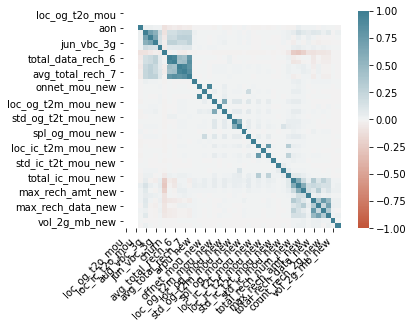

In [80]:
# HeatMap : correlation
corr = churn.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [81]:
len(to_drop)

6

In [82]:
to_drop

['avg_total_rech_6',
 'avg_total_rech_7',
 'avg_total_earning',
 'loc_og_t2t_mou_new',
 'loc_ic_mou_new',
 'count_rech_2g_new']

In [83]:
# dropping columns based on high correlation
churn = churn.drop(['avg_total_rech_6', 'avg_total_rech_7'], axis=1)

In [84]:
churn.shape

(29953, 42)

## Step 7: Train-Test Split

In [85]:
# separating independent and dependent variables
y = churn['churn']
X = churn.drop(['churn'],axis=1)

In [86]:
# train-test split (70% train, 30% test data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [87]:
# train size
X_train.shape

(20967, 41)

In [88]:
# test size
X_test.shape

(8986, 41)

## Step 8: Dealing with imbalance dataset (using SMOTE)

In [89]:
# checking the number of datapoints in each class
obj = pd.Index(churn['churn'])
obj.value_counts(dropna=False)

0    27520
1     2433
Name: churn, dtype: int64

Not Churn: 27520 (**91.8%**)<br>
Churn: 2433 (**8.2%**)

In [90]:
X_train.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,avg_total_earning,arpu_new,onnet_mou_new,offnet_mou_new,loc_og_t2t_mou_new,loc_og_t2m_mou_new,loc_og_t2f_mou_new,loc_og_mou_new,std_og_t2t_mou_new,std_og_t2m_mou_new,std_og_mou_new,spl_og_mou_new,total_og_mou_new,loc_ic_t2t_mou_new,loc_ic_t2m_mou_new,loc_ic_t2f_mou_new,loc_ic_mou_new,std_ic_t2t_mou_new,std_ic_t2m_mou_new,std_ic_mou_new,total_ic_mou_new,total_rech_num_new,total_rech_amt_new,max_rech_amt_new,last_day_rch_amt_new,total_rech_data_new,max_rech_data_new,count_rech_2g_new,av_rech_amt_data_new,vol_2g_mb_new,arpu_2g_new
count,20967.0,20967.0,20967.0,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000
mean,0.0,0.0,0.0,1210.366242,170.067401,177.848645,160.417238,8.384899,458.480832,523.606041,1152.620844,0.013917,0.295731,0.186102,0.423717,0.123888,0.155247,0.125312,0.171259,0.189877,0.169224,0.713145,0.097615,0.172721,0.091961,0.266011,0.048580,0.404167,0.977328,0.418962,0.046011,-0.034309,-0.019516,0.005585,0.041933,-0.000285,0.008665,-0.005518,0.009242,2.935494,5.833564
std,0.0,0.0,0.0,960.768593,422.898219,442.154868,414.666421,53.700801,1491.106320,1433.093532,1375.387864,2.869469,20.187386,13.007903,21.481983,3.894745,3.705415,5.681912,6.306404,3.676127,3.898756,18.481463,3.408373,4.313767,2.070264,5.665766,0.952752,7.012305,76.203898,9.690184,1.042735,0.122628,0.170229,0.180663,0.615805,0.257069,0.353445,0.241349,0.553321,123.576001,193.406788
min,0.0,0.0,0.0,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,478.500000,-8.007267,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-2678.083333
25%,0.0,0.0,0.0,456.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,604.000000,-0.094406,-0.138572,-0.120580,-0.150870,-0.126081,-0.186050,-0.119552,-0.153117,-0.187085,-0.172744,-0.245212,-0.114610,-0.139369,-0.104618,-0.191869,-0.095624,-0.218349,-0.211292,-0.188187,-0.092845,-0.113636,-0.108165,-0.070000,-0.201962,-0.088998,-0.031250,-0.083333,-0.098291,-0.167397,-0.220898
50%,0.0,0.0,0.0,849.000000,0.000000,0.000000,0.000000,0.000000,96.000000,125.000000,801.500000,-0.023481,-0.027843,-0.026680,-0.024465,-0.021853,0.000000,-0.020138,0.000000,-0.003487,-0.014639,0.000000,-0.022565,-0.021808,-0.011882,0.000000,-0.012764,0.000000,-0.021340,-0.036034,-0.012590,-0.050000,-0.028786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,1762.500000,130.210000,140.660000,104.690000,0.000000,400.000000,575.000000,1214.000000,0.047989,0.071706,0.062626,0.085041,0.076700,0.000000,0.068663,0.000000,0.026046,0.036294,0.000000,0.057285,0.102015,0.086805,0.047944,0.074206,0.000000,0.067307,0.093405,0.071757,0.027778,0.048421,0.050369,0.083497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,0.0,0.0,4321.000000,12916.220000,9165.600000,7581.250000,2618.570000,105644.000000,43617.000000,61236.000000,392.107143,2776.750000,1845.059524,2776.750000,499.710000,474.250000,593.750000,867.750000,245.250000,397.750000,2310.250000,418.900000,547.750000,224.665842,722.386364,97.509615,551.250000,10965.250000,1071.250000,105.451923,1.812500,8.150000,8.150000,46.878571,5.750000,15.500000,5.750000,47.107143,13874.250000,12520.750000


In [91]:
X_train.shape

(20967, 41)

In [94]:
churn.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_data_rech_6,total_data_rech_7,avg_total_earning,arpu_new,onnet_mou_new,offnet_mou_new,loc_og_t2t_mou_new,loc_og_t2m_mou_new,loc_og_t2f_mou_new,loc_og_mou_new,std_og_t2t_mou_new,std_og_t2m_mou_new,std_og_mou_new,spl_og_mou_new,total_og_mou_new,loc_ic_t2t_mou_new,loc_ic_t2m_mou_new,loc_ic_t2f_mou_new,loc_ic_mou_new,std_ic_t2t_mou_new,std_ic_t2m_mou_new,std_ic_mou_new,total_ic_mou_new,total_rech_num_new,total_rech_amt_new,max_rech_amt_new,last_day_rch_amt_new,total_rech_data_new,max_rech_data_new,count_rech_2g_new,av_rech_amt_data_new,vol_2g_mb_new,arpu_2g_new
count,29953.0,29953.0,29953.0,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,0.0,0.0,0.0,1209.280573,169.276670,179.057629,158.731865,8.037804,0.081227,456.387566,528.958341,1153.701715,0.010181,0.243559,0.159242,0.343358,0.117049,0.168615,0.108770,0.215205,0.226792,0.204321,0.782073,0.098852,0.232205,0.094428,0.247376,0.062834,0.418038,0.857571,0.497199,0.047481,-0.034121,-0.019687,0.005570,0.042279,0.000175,0.006354,-0.004857,0.007315,2.924637,7.133501
std,0.0,0.0,0.0,957.449442,421.128001,443.756247,416.989501,52.413217,0.273188,1419.713940,1477.097887,1359.533621,2.521843,16.908281,11.001632,17.991436,3.479613,4.248656,4.779916,7.954317,5.378875,5.386605,17.761132,3.507623,8.854335,2.350980,5.015676,2.570931,6.853579,64.742379,17.590296,0.994236,0.122877,0.164648,0.177992,0.603161,0.264416,0.334652,0.244852,0.499616,139.780910,356.068893
min,0.0,0.0,0.0,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,478.500000,-8.007267,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-2678.083333
25%,0.0,0.0,0.0,460.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,604.000000,-0.093776,-0.138853,-0.119681,-0.150636,-0.125475,-0.182612,-0.118819,-0.154461,-0.185964,-0.171665,-0.244643,-0.113487,-0.139192,-0.104526,-0.193260,-0.094965,-0.216306,-0.208957,-0.187411,-0.091912,-0.113636,-0.107422,-0.070144,-0.204545,-0.085821,-0.030000,-0.083333,-0.097222,-0.166739,-0.220915
50%,0.0,0.0,0.0,846.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.000000,100.000000,800.500000,-0.023555,-0.027543,-0.026515,-0.024307,-0.021156,0.000000,-0.019725,0.000000,-0.000859,-0.013949,0.000000,-0.022053,-0.021809,-0.011890,0.000000,-0.012802,0.000000,-0.020943,-0.035275,-0.012737,-0.050000,-0.027964,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,1756.000000,129.130000,137.860000,98.750000,0.000000,0.000000,400.000000,575.000000,1209.000000,0.047678,0.072864,0.062967,0.087044,0.077890,0.000000,0.068753,0.000000,0.028161,0.037460,0.000000,0.057638,0.104119,0.086061,0.045775,0.074393,0.000000,0.064663,0.093750,0.071194,0.027778,0.047986,0.052198,0.084783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,0.0,0.0,4321.000000,12916.220000,9165.600000,11166.210000,2618.570000,1.000000,105644.000000,55080.000000,61236.000000,392.107143,2776.750000,1845.059524,2776.750000,499.710000,474.250000,593.750000,867.750000,506.200000,617.400000,2310.250000,418.900000,1221.750000,265.416667,722.386364,419.250000,551.250000,10965.250000,2627.750000,105.451923,1.812500,8.150000,8.150000,46.878571,10.250000,15.500000,5.750000,47.107143,16

In [95]:
# replacing inf with zero
X_train.replace([np.inf, -np.inf], 0)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,avg_total_earning,arpu_new,onnet_mou_new,offnet_mou_new,loc_og_t2t_mou_new,loc_og_t2m_mou_new,loc_og_t2f_mou_new,loc_og_mou_new,std_og_t2t_mou_new,std_og_t2m_mou_new,std_og_mou_new,spl_og_mou_new,total_og_mou_new,loc_ic_t2t_mou_new,loc_ic_t2m_mou_new,loc_ic_t2f_mou_new,loc_ic_mou_new,std_ic_t2t_mou_new,std_ic_t2m_mou_new,std_ic_mou_new,total_ic_mou_new,total_rech_num_new,total_rech_amt_new,max_rech_amt_new,last_day_rch_amt_new,total_rech_data_new,max_rech_data_new,count_rech_2g_new,av_rech_amt_data_new,vol_2g_mb_new,arpu_2g_new
59193,0.0,0.0,0.0,618,0.00,0.00,0.00,0.0,0.0,0.0,587.0,-0.094438,0.336114,-0.091951,0.000000,-0.048398,-0.250000,-0.050699,0.336114,-0.094595,-0.065483,-0.111193,-0.065122,-0.167910,-0.152157,0.000000,-0.151685,1.718481,-0.202032,-0.183645,-0.164068,0.014151,-0.092419,-0.093750,-0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
41301,0.0,0.0,0.0,1911,226.10,587.68,23.85,139.6,232.0,794.0,794.5,0.084230,-0.250000,0.490061,-0.250000,0.118671,0.000000,0.071823,-0.250000,0.000000,0.996269,-0.178191,0.045394,-0.250000,-0.095926,0.143648,-0.047121,-0.250000,0.762542,0.454889,0.072893,0.150000,0.103464,-0.038630,0.057203,0.250000,-0.038630,0.750000,0.059942,-0.205241,0.040906
77012,0.0,0.0,0.0,341,919.30,0.00,0.00,0.0,154.0,616.0,986.0,0.092691,-0.022010,-0.027372,0.264482,0.204932,-0.188632,0.221798,-0.110120,-0.127154,-0.119696,0.000000,-0.018844,0.349652,-0.007460,-0.108278,0.120242,0.033052,1.287513,0.394047,0.133346,0.116667,0.036190,0.000000,0.070833,0.416667,0.000000,0.250000,0.412338,-0.219451,3197.750000
16823,0.0,0.0,0.0,1351,655.03,623.69,822.26,0.0,212.0,0.0,506.0,0.208489,-0.047490,0.044015,-0.046109,0.048360,-0.083333,0.005986,-0.250000,-0.182309,-0.135201,0.000000,0.007443,-0.009739,0.243696,-0.182401,0.067233,-0.250000,-0.244703,0.007190,0.063638,0.031250,0.297500,0.275210,0.264286,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000
69457,0.0,0.0,0.0,1080,61.26,205.00,0.00,0.0,198.0,198.0,742.0,-0.148401,-0.245349,-0.238644,-0.250000,-0.250000,0.000000,-0.250000,-0.245139,-0.250000,-0.245177,-0.162571,-0.244731,0.097741,-0.145325,-0.250000,-0.046120,-0.248391,1.906863,0.214617,-0.020482,-0.102941,-0.136029,-0.029018,-0.250000,0.000000,0.000000,0.000000,0.000000,-0.249851,-0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57907,0.0,0.0,0.0,2881,424.62,487.04,0.00,0.0,0.0,154.0,938.5,0.052406,-0.062050,0.008105,-0.062050,0.010660,-0.250000,-0.002466,0.000000,-0.250000,-0.250000,-0.250000,-0.003857,-0.054967,-0.103153,-0.239368,-0.094692,0.000000,-0.250000,-0.250000,-0.096356,0.000000,0.461259,0.219632,0.636914,0.250000,0.331169,-0.250000,0.331169,0.195413,0.000000
17145,0.0,0.0,0.0,1651,0.00,0.00,0.00,0.0,1700.0,25.0,1130.0,-0.121327,-0.075066,0.016715,-0.075066,0.027988,-0.250000,0.016573,0.000000,0.000000,0.000000,-0.160433,0.012060,0.280718,-0.073667,0.116071,-0.005099,0.000000,2.105932,2.105932,0.010740,-0.147059,-0.147196,-0.050000,-0.114865,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000
40614,0.0,0.0,0.0,389,0.00,0.00,0.00,0.0,25.0,25.0,1063.0,-0.161647,-0.156278,-0.206510,-0.170227,-0.208606,0.000000,-0.181778,-0.149842,-0.212076,-0.197287,10.973684,-0.193665,-0.173259,-0.216839,-0.250000,-0.182507,-0.250000,-0.244103,-0.245874,-0.183566,-0.184783,-0.218690,0.003906,-0.250000,0.000000,0.000000,0.000000,0.000000,6.197368,1.129679
826,0.0,0.0,0.0,675,0.00,0.00,0.00,0.0,154.0,616.0,1110.0,0.040164,0.146006,-0.153163,-0.189524,-0.112899,-0.236570,-0.167104,0.257065,-0.182659,0.241352,0.098614,-0.029223,-0.233230,-0.130505,-0.228742,-0.182991,0.240411,-0.211706,0.191417,-0.008128,-0.092105,0.094828,0.000000,0.250000,-0.083333,0.000000,-0.083333,-0.083333,0.206962,-0.155079


In [96]:
# replacing Nan with zero
X_train.fillna(0) 

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,avg_total_earning,arpu_new,onnet_mou_new,offnet_mou_new,loc_og_t2t_mou_new,loc_og_t2m_mou_new,loc_og_t2f_mou_new,loc_og_mou_new,std_og_t2t_mou_new,std_og_t2m_mou_new,std_og_mou_new,spl_og_mou_new,total_og_mou_new,loc_ic_t2t_mou_new,loc_ic_t2m_mou_new,loc_ic_t2f_mou_new,loc_ic_mou_new,std_ic_t2t_mou_new,std_ic_t2m_mou_new,std_ic_mou_new,total_ic_mou_new,total_rech_num_new,total_rech_amt_new,max_rech_amt_new,last_day_rch_amt_new,total_rech_data_new,max_rech_data_new,count_rech_2g_new,av_rech_amt_data_new,vol_2g_mb_new,arpu_2g_new
59193,0.0,0.0,0.0,618,0.00,0.00,0.00,0.0,0.0,0.0,587.0,-0.094438,0.336114,-0.091951,0.000000,-0.048398,-0.250000,-0.050699,0.336114,-0.094595,-0.065483,-0.111193,-0.065122,-0.167910,-0.152157,0.000000,-0.151685,1.718481,-0.202032,-0.183645,-0.164068,0.014151,-0.092419,-0.093750,-0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
41301,0.0,0.0,0.0,1911,226.10,587.68,23.85,139.6,232.0,794.0,794.5,0.084230,-0.250000,0.490061,-0.250000,0.118671,0.000000,0.071823,-0.250000,0.000000,0.996269,-0.178191,0.045394,-0.250000,-0.095926,0.143648,-0.047121,-0.250000,0.762542,0.454889,0.072893,0.150000,0.103464,-0.038630,0.057203,0.250000,-0.038630,0.750000,0.059942,-0.205241,0.040906
77012,0.0,0.0,0.0,341,919.30,0.00,0.00,0.0,154.0,616.0,986.0,0.092691,-0.022010,-0.027372,0.264482,0.204932,-0.188632,0.221798,-0.110120,-0.127154,-0.119696,0.000000,-0.018844,0.349652,-0.007460,-0.108278,0.120242,0.033052,1.287513,0.394047,0.133346,0.116667,0.036190,0.000000,0.070833,0.416667,0.000000,0.250000,0.412338,-0.219451,3197.750000
16823,0.0,0.0,0.0,1351,655.03,623.69,822.26,0.0,212.0,0.0,506.0,0.208489,-0.047490,0.044015,-0.046109,0.048360,-0.083333,0.005986,-0.250000,-0.182309,-0.135201,0.000000,0.007443,-0.009739,0.243696,-0.182401,0.067233,-0.250000,-0.244703,0.007190,0.063638,0.031250,0.297500,0.275210,0.264286,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000
69457,0.0,0.0,0.0,1080,61.26,205.00,0.00,0.0,198.0,198.0,742.0,-0.148401,-0.245349,-0.238644,-0.250000,-0.250000,0.000000,-0.250000,-0.245139,-0.250000,-0.245177,-0.162571,-0.244731,0.097741,-0.145325,-0.250000,-0.046120,-0.248391,1.906863,0.214617,-0.020482,-0.102941,-0.136029,-0.029018,-0.250000,0.000000,0.000000,0.000000,0.000000,-0.249851,-0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57907,0.0,0.0,0.0,2881,424.62,487.04,0.00,0.0,0.0,154.0,938.5,0.052406,-0.062050,0.008105,-0.062050,0.010660,-0.250000,-0.002466,0.000000,-0.250000,-0.250000,-0.250000,-0.003857,-0.054967,-0.103153,-0.239368,-0.094692,0.000000,-0.250000,-0.250000,-0.096356,0.000000,0.461259,0.219632,0.636914,0.250000,0.331169,-0.250000,0.331169,0.195413,0.000000
17145,0.0,0.0,0.0,1651,0.00,0.00,0.00,0.0,1700.0,25.0,1130.0,-0.121327,-0.075066,0.016715,-0.075066,0.027988,-0.250000,0.016573,0.000000,0.000000,0.000000,-0.160433,0.012060,0.280718,-0.073667,0.116071,-0.005099,0.000000,2.105932,2.105932,0.010740,-0.147059,-0.147196,-0.050000,-0.114865,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000
40614,0.0,0.0,0.0,389,0.00,0.00,0.00,0.0,25.0,25.0,1063.0,-0.161647,-0.156278,-0.206510,-0.170227,-0.208606,0.000000,-0.181778,-0.149842,-0.212076,-0.197287,10.973684,-0.193665,-0.173259,-0.216839,-0.250000,-0.182507,-0.250000,-0.244103,-0.245874,-0.183566,-0.184783,-0.218690,0.003906,-0.250000,0.000000,0.000000,0.000000,0.000000,6.197368,1.129679
826,0.0,0.0,0.0,675,0.00,0.00,0.00,0.0,154.0,616.0,1110.0,0.040164,0.146006,-0.153163,-0.189524,-0.112899,-0.236570,-0.167104,0.257065,-0.182659,0.241352,0.098614,-0.029223,-0.233230,-0.130505,-0.228742,-0.182991,0.240411,-0.211706,0.191417,-0.008128,-0.092105,0.094828,0.000000,0.250000,-0.083333,0.000000,-0.083333,-0.083333,0.206962,-0.155079


In [97]:
# Feature scaling : Standardization
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [98]:
X_train.shape

(20967, 41)

In [99]:
#SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 1703
Before OverSampling, counts of label '0': 19264 

After OverSampling, the shape of train_X: (38528, 41)
After OverSampling, the shape of train_y: (38528,) 

After OverSampling, counts of label '1': 19264
After OverSampling, counts of label '0': 19264


## Step 9: Model Building and Evaluation

In [100]:
data2 = {'Model Name':[], 'Weighted_f1_score':[] ,'Accuracy_Score':[],  'Recall_score':[], 'Precision_Score':[]}

#create dataframe
df_clf = pd.DataFrame(data2)

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

In [102]:
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

In [103]:
# Model training using PCA.
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score


# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(), 
               RandomForestClassifier(n_estimators=500, random_state=0), 
               XGBClassifier(), 
               SVC(C=1000,  kernel="rbf", gamma= 0.0001 )]

for clf in classifiers:
    model_pipe = Pipeline([('scaler', preprocessing.MinMaxScaler()),
                           ('pca', PCA(n_components= 10)),
                           ('clf', clf)])
    
    model = model_pipe.fit(X_train_res, y_train_res)
    y_pred_clf = model_pipe.predict(X_test)
    
    #Macro_f1_score =f1_score(y_valid, y_pred_clf, average='macro')

    #Micro_f1_score =f1_score(y_valid, y_pred_clf, average='micro')
    
    Weighted_f1_score =f1_score(y_test, y_pred_clf, average='weighted')
    
    Accuracy_Score =accuracy_score(y_test, y_pred_clf)
    
    Precision_Score = precision_score(y_test, y_pred_clf, average='weighted')
    
    Recall_score =recall_score(y_test, y_pred_clf, average='weighted')
    
#     Roc_Auc_score =multiclass_roc_auc_score(y_test, y_pred_clf)
    
    new_row = {'Model Name':clf.__class__.__name__ , 'Weighted_f1_score':Weighted_f1_score ,'Accuracy_Score':Accuracy_Score, 'Recall_score':Recall_score, 'Precision_Score':Precision_Score}
    df_clf = df_clf.append(new_row, ignore_index=True)

[15:22:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [104]:
# Let's see our accuracy of model on different metrices
df_clf

,Model Name,Weighted_f1_score,Accuracy_Score,Recall_score,Precision_Score
0,LogisticRegression,0.821478,0.774538,0.774538,0.908130
1,RandomForestClassifier,0.879447,0.861229,0.861229,0.906973
2,XGBClassifier,0.862909,0.836078,0.836078,0.906393
3,SVC,0.828438,0.784665,0.784665,0.907634


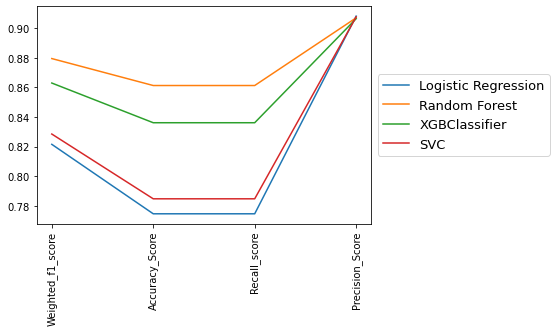

In [105]:
# Plotting all the metrices on the graph
row =  df_clf.loc[:, df_clf.columns != 'Model Name']
x = [1, 2, 3, 4]
lble =["Logistic Regression", "Random Forest", "XGBClassifier",  "SVC"]
labels = row.columns
i=0
for index, row in row.iterrows():
    if i<=len(lble)-1:
        y =row
        plt.plot(x, y, label =lble[i])
        i=i+1
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size':13})
plt.xticks(x, labels, rotation='vertical')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size':13})
plt.savefig("MetricGrpah.pdf", dpi=None, facecolor='w', edgecolor='w',
     orientation='portrait', papertype=None, format=None,
     transparent=False, bbox_inches=None, pad_inches=0.1,
     frameon=None, metadata=None)
plt.show()

In [106]:
data3 = {'Model Name':[], 'Weighted_f1_score':[] ,'Accuracy_Score':[],  'Recall_score':[],  'Precision_Score':[]}

#create dataframe
df_clf2 = pd.DataFrame(data3)

In [107]:
# Model training without PCA.
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(), 
               RandomForestClassifier(n_estimators=500, random_state=0), 
               XGBClassifier(), 
               SVC(C=1000,  kernel="rbf", gamma= 0.0001 )]

for clf in classifiers:
    model = clf.fit(X_train_res, y_train_res)
    y_pred_clf = clf.predict(X_test)
    
    #Macro_f1_score =f1_score(y_valid, y_pred_clf, average='macro')

    #Micro_f1_score =f1_score(y_valid, y_pred_clf, average='micro')
    
    Weighted_f1_score =f1_score(y_test, y_pred_clf, average='weighted')
    
    Accuracy_Score =accuracy_score(y_test, y_pred_clf)
    
    Precision_Score = precision_score(y_test, y_pred_clf, average='weighted')
    
    Recall_score =recall_score(y_test, y_pred_clf, average='weighted')
    
#     Roc_Auc_score =multiclass_roc_auc_score(y_test, y_pred_clf)
    
    new_row = {'Model Name':clf.__class__.__name__ , 'Weighted_f1_score':Weighted_f1_score ,'Accuracy_Score':Accuracy_Score, 'Recall_score':Recall_score, 'Precision_Score':Precision_Score}
    df_clf2 = df_clf2.append(new_row, ignore_index=True)

[15:25:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [108]:
# Let's see our accuracy of model on different metrices
df_clf2

,Model Name,Weighted_f1_score,Accuracy_Score,Recall_score,Precision_Score
0,LogisticRegression,0.826993,0.781660,0.781660,0.912622
1,RandomForestClassifier,0.923040,0.918317,0.918317,0.929613
2,XGBClassifier,0.922491,0.919542,0.919542,0.926136
3,SVC,0.865065,0.855553,0.855553,0.875853


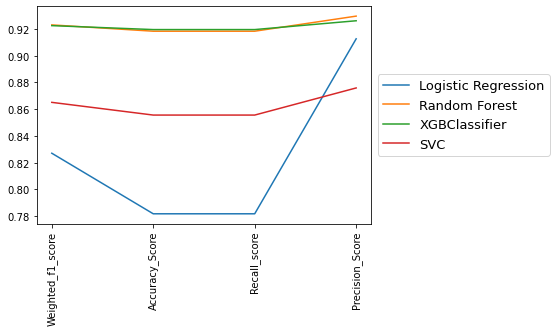

In [109]:
# Plotting all the metrices on the graph
row =  df_clf2.loc[:, df_clf2.columns != 'Model Name']
x = [1, 2, 3, 4]
lble =["Logistic Regression", "Random Forest", "XGBClassifier",  "SVC"]
labels = row.columns
i=0
for index, row in row.iterrows():
    if i<=len(lble)-1:
        y =row
        plt.plot(x, y, label =lble[i])
        i=i+1
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size':13})
plt.xticks(x, labels, rotation='vertical')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size':13})
plt.savefig("MetricGrpah.pdf", dpi=None, facecolor='w', edgecolor='w',
     orientation='portrait', papertype=None, format=None,
     transparent=False, bbox_inches=None, pad_inches=0.1,
     frameon=None, metadata=None)
plt.show()

## Step 10: Evaluating important attributes

In [110]:
# First we build and train our Random Forest Model 
rf = RandomForestClassifier(max_depth=10, random_state=42, n_estimators = 300)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

[]

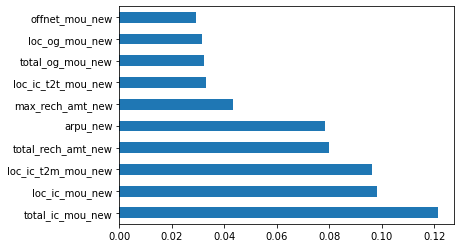

In [111]:
# Getting top 10 features
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.plot()
# feature_importances = pd.DataFrame(rf.feature_importances_, index =rf.columns)

**Below are the top 10 most important features for predicting churn rate of the customers:**
1. total_ic_mou_new
2. loc_ic_mou_new
3. loc_ic_t2m_mou_new
4. total_rech_amt_new
5. arpu_new
6. max_rech_amt_new
7. loc_ic_t2t_mou_new
8. total_og_mou_new
9. loc_og_mou_new
10. offnet_mou_new 

**Based on our observations and important features, we suggest the following strategy for the company to reduce the churn rate:**<br><br>
` 1. Introduce special plans for local call from mobile to mobile within same operator or other operator` <br>
` 2. Recharge amount should be reduced` <br>